# Group Number - 39

Compound - $\text{AlO}$:
- Element A is $\text{Al}$
- Element B is $\text{O}$

## Imports

In [146]:
import numpy as np
import matplotlib.pyplot as plt

# Question 2

## Question 2.1

### Question 2.1.1 - Theoretical Questions

We can see that:
- The space group number is 225, corresponding to a FCC lattice.

- There are two inequivalent Wyckoff positions that are occupied, 4a and 4b, both have a multiplicity of 4 and both are fixed. The corresponding point group is Fm-3m.

- Formally, a point group is the the set of **fixed point** symmetry operations on an object (where the group operation is the composition of symmetries).
    
    A crystallographic point group is a point group that is compatible with some 3D lattice (for example, it needs to satisfy the crystallographic restriction theorem).
    
    Finaly, a space group is a combination of crystallographic point group with a Bravais lattice (meaning it now includes **non fixed point** operations such as translations and screw rotations).  

### Question 2.1.2 - Setting up the SCF calculation

We calculate the desired quantities:

- Sum of Atomic Radii of Na and Cl is 269pm.
- Sum of Atomic Radii of Al and O is 166pm.

Hence we will choose our lattice parameter as:
$$
\begin{align*}

a_\text{AlO} &= a_\text{NaCl} \times \frac{R_\text{Al} + R_\text{O}}{R_\text{Na} + R_\text{Cl}}
\\\\

&= 5.64 \AA \times \frac{166}{269}
\\\\

&\approx 3.48 \AA

\end{align*}
$$

In atomic units this length has numerical value $6.576$.

### Question 2.1.3 - Convergence Tests

In [147]:
# Target threshold on the energy (in Ry considering we have two atoms per unit cell)
etarget = 0.0007349859 * 2

#### Convergence on ECUT

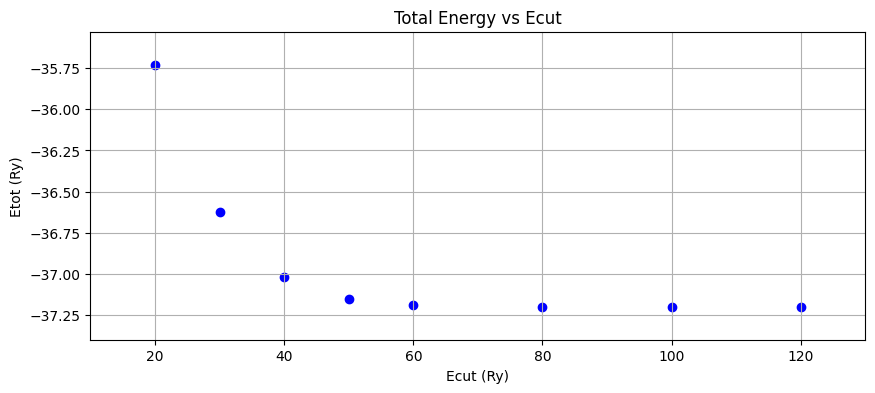

In [148]:
# ENERGY AS A FUNCTION OF ECUT

# Read the data from AlO.scf.ecut.out
kk, etot = [], []

with open('AlO.scf.ecut.out', 'r') as file:
    for line in file:
        e, t = line.split(" ")
        kk.append(int(e.split(".")[2].split("-")[1]))
        etot.append(float(t))

kk, etot = zip(*sorted(zip(kk, etot)))


# Plotting
plt.figure(figsize=(10, 4))
plt.title('Total Energy vs Ecut')
plt.scatter(kk, etot, marker='o', linestyle='-', color='b')

plt.xlabel('Ecut (Ry)')
plt.ylabel('Etot (Ry)')
plt.grid(True)

plt.xlim(min(kk) - 10, max(kk) + 10)
plt.ylim(min(etot) - 0.2, max(etot) + 0.2)

plt.show()

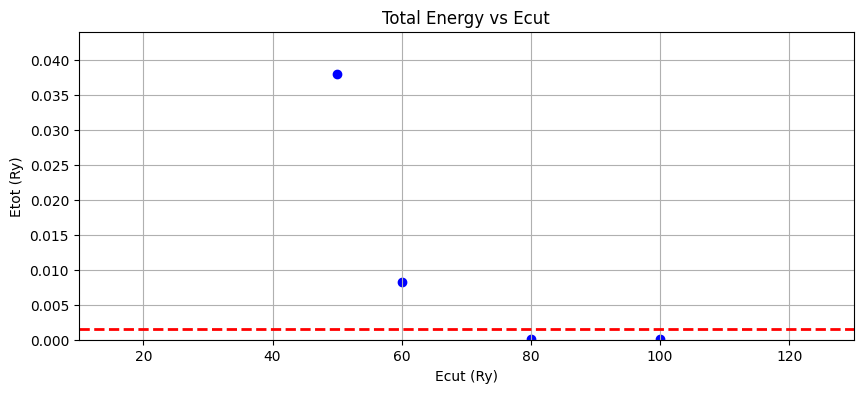

In [149]:
# CONVERGENCE ON ECUT

# Calculate Energy Differences
edelta = [abs(etot[i+1] - etot[i]) for i in range(len(kk) - 1)]

# Plotting
plt.figure(figsize=(10, 4))
plt.title('Total Energy vs Ecut')
plt.scatter(kk[:-1], edelta, marker='o', linestyle='-', color='b')

plt.xlabel('Ecut (Ry)')
plt.ylabel('Etot (Ry)')
plt.grid(True)

plt.xlim(min(kk) - 10, max(kk) + 10)
plt.ylim(0, 30 * etarget)

plt.axhline(y=etarget, color='r', linestyle='--', linewidth=2)

plt.savefig('AlO.scf.ecut.png')
plt.show()

We can see on the graphs above that:
1. The energy decreases as we increase the cutoff for the energy, as is predicted by the variational principle.
2. As we increase $E_\text{cut}$ the change in energy goes down, and we get the desired precision when $E_\text{cut} = 80\text{Ry}$ because increasing the energy further changes the energy by a value smaller then the desired precision.

#### Convergence on the K-Points

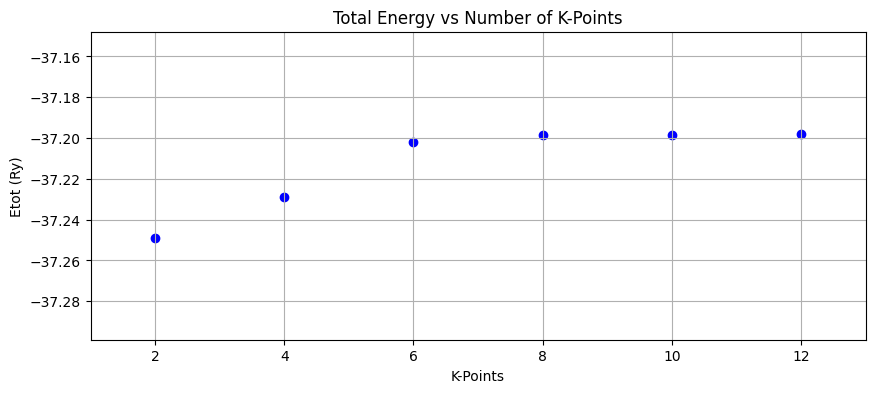

In [150]:
# ENERGY AS A FUNCTION OF THE NUMBER OF K-POINTS

# Read the data from AlO.scf.kk.out
kk, etot = [], []

with open('AlO.scf.kk.out', 'r') as file:
    for line in file:
        e, t = line.split(" ")
        kk.append(int(e.split(".")[2].split("-")[1]))
        etot.append(float(t))

kk, etot = zip(*sorted(zip(kk, etot)))


# Plotting
plt.figure(figsize=(10, 4))
plt.title('Total Energy vs Number of K-Points')
plt.scatter(kk, etot, marker='o', linestyle='-', color='b')

plt.xlabel('K-Points')
plt.ylabel('Etot (Ry)')
plt.grid(True)

plt.xlim(min(kk) - 1, max(kk) + 1)
plt.ylim(min(etot) - 0.05, max(etot) + 0.05)

plt.show()

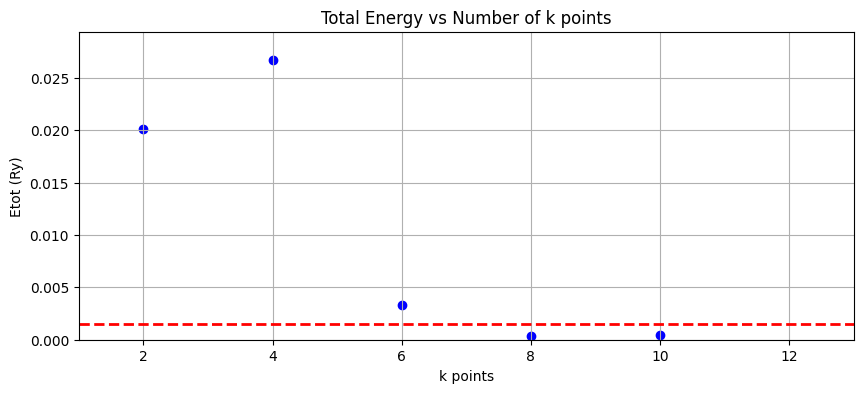

In [151]:
# CONVERGENCE ON THE NUMBER OF K-POINTS

# Calculate Energy Differences
edelta = [abs(etot[i+1] - etot[i]) for i in range(len(kk) - 1)]

# Plotting
plt.figure(figsize=(10, 4))
plt.title('Total Energy vs Number of k points')
plt.scatter(kk[:-1], edelta, marker='o', linestyle='-', color='b')

plt.xlabel('k points')
plt.ylabel('Etot (Ry)')
plt.grid(True)

plt.xlim(min(kk) - 1, max(kk) + 1)
plt.ylim(0, 20 * etarget)

plt.axhline(y=etarget, color='r', linestyle='--', linewidth=2)

plt.savefig('AlO.scf.kk.png')
plt.show()

We can see on the graphs above that:
1. There is no variational principle for the number of k-points, as they are related to how we do Brillouin zone integrals, not to the trial wave functions themselves, hence the energy can fluctuate.
2. As we increase the number of k-points the change in energy goes down, and we get the desired precision when $k = 8$ because increasing the number of k-points  further changes the energy by a value smaller then the desired precision.

As a final note, in order to ensure consistency, we used:
- $E_\text{cut} = 80\text{Ry}$ to do the converge on the k-points.
- $k = 8$ to do the converge on the cutoff energy.

## Question 2.2

### Question 2.2.1 - Structural Relaxation in Quantum Espresso

Structural Relaxation is a procedure that attempts to find the positions of the atoms within our crystal that minimize the energy of the system, that is, it atempts to find minima of the function $E(\textbf R_I)$ where $\textbf R_I$ represents the positions of the atoms.

This procedure is implemented by calculating the forces felt by each atom and using a minimization algorithm on the forces, moving the atoms to a new position where the force they feel is smaller. At equilibrium the forces will be zero.

Quantum Espresso uses the Helmann-Feynman theorem to calculate forces, giving the following result:
$$
\begin{align*}

\textbf F_{I} &= -\frac{\partial E}{\partial \textbf R_I}
\\\\

&= -{\bigg \langle }\psi\ {\bigg |}{\frac {d {H}}{d \textbf R_I}}{\bigg |}\ \psi{\bigg \rangle }
\\\\

&= \sum_iZ_I\cdot {\bigg \langle }\psi\ \bigg |\frac{\textbf r_i - \textbf R_I}{|\textbf r_i - \textbf R_I|^{3}} \bigg |\ \psi{\bigg \rangle }

\end{align*}
$$

### Question 2.2.2 - Initial Configuration

The pressure we got for our initial setup was $3180.43\text{kbar}$ (as can be seen in the `AlO.scf.out` file) and the forces acting on the atoms are as follows:

```
atom    1 type  1   force =     0.00000000    0.00000000    0.00000000
atom    2 type  2   force =     0.00000000    0.00000000    0.00000000
```

This means that the atoms are in a position that minimizes the energy for the given lattice parameters, but that the chosen lattice parameter corresponds to a pressure of $3180.43\text{kbar}$. If we relax the cell to ambient pressure we expect the volume of the unit cell to be larger (because we are reducing the pressure).

### Question 2.2.3 - Implementing Structural Relaxation

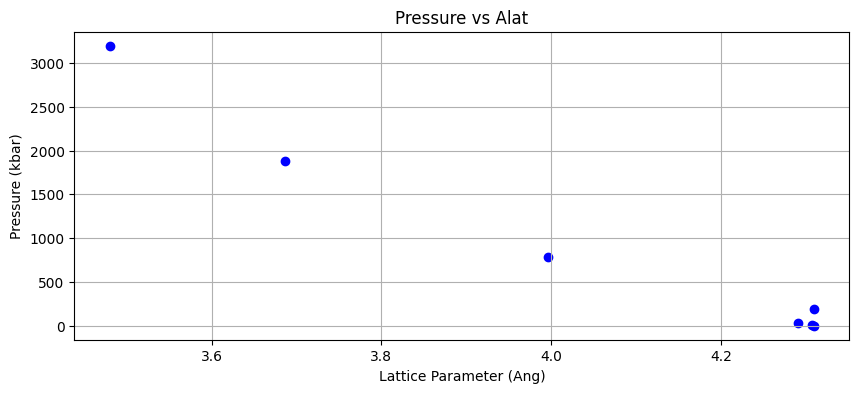

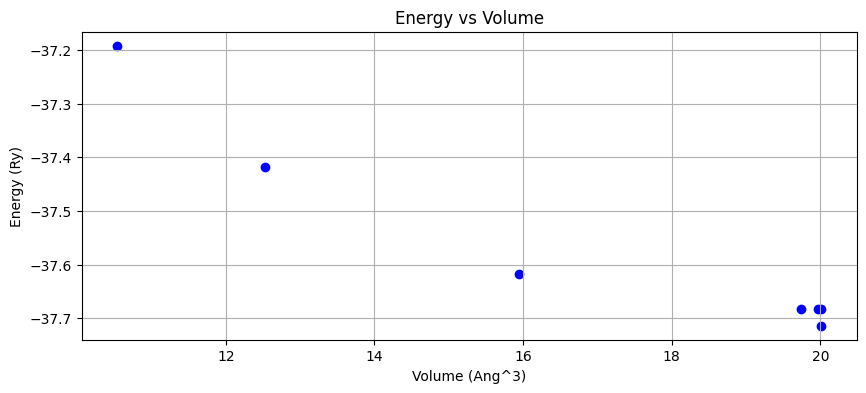

In [152]:
# PRESSURE AS A FUNCTION OF THE LATTICE PARAMETER

# Angstrom in Atomic Units
ang = 0.529177249

# Get the volume and convert to ang
vol = []
with open('AlO.vcrelax.vol.out', 'r') as file:
    for line in file:
        vol += [(float(line.split("=")[1].split()[0])) * ang**3]

# The last value is duplicated, discard it
vol = vol[:-1]

# Get the volume, multiply it by 4 and cube root it (volume of convetional cube is 4 times the volume of FCC unit cell)
alat = [(i * 4) ** (1/3) for i in vol]


# Get the pressures
pp = []
with open('AlO.vcrelax.pp.out', 'r') as file:
    for line in file:
        pp += [(float(line.split("=")[1].split()[0]))]


# Get the pressures
ee = []
with open('AlO.vcrelax.energy.out', 'r') as file:
    for line in file:
        ee += [(float(line.split("=")[1].split()[0]))]


# Plotting
plt.figure(figsize=(10, 4))
plt.title('Pressure vs Alat')
plt.scatter(alat, pp, marker='o', linestyle='-', color='b')

plt.xlabel('Lattice Parameter (Ang)')
plt.ylabel('Pressure (kbar)')
plt.grid(True)

plt.savefig('AlO.scf.pressure.png')
plt.show()



# Plotting
plt.figure(figsize=(10, 4))
plt.title('Energy vs Volume')
plt.scatter(vol, ee, marker='o', linestyle='-', color='b')

plt.xlabel('Volume (Ang^3)')
plt.ylabel('Energy (Ry)')
plt.grid(True)

plt.savefig('AlO.scf.energy.png')
plt.show()

We made two plots:
1. We should monitor how the pressure evolves as the lattice parameter changes, to ensure that we converge on the desired pressure.
2. We also monitored the energy as a function of the volume to make sure that as the volume changed the energy of the system went down (toward a minima as explained in question 2.2.1)

We should also note that at the last (rightmost) abcissa there are two points, this happens because QE does another scf calculation using the new reciprocal lattice, meaning we might get different results compared to using the reciprocal lattice of the unrelaxed crystal!

### Question 2.2.4

Given the comment at the end of the last question, because the difference in energy and pressure is very different between the two points with the same abcissa, we ran structural relaxation two more times until we obtained convergence.

### Question 2.2.5

We were able to use the full k grid we determined above.

### Question 2.2.6

We have that (from the file `AlO.vcrelax3.out`):
- Final volume: $V = 22.36934\ \AA^3$
- Final lattice parameter: $V = 4.473\ \AA$

## Question 2.3 - Electronic Properties

In [153]:
# Fermi Energy (can be extracted from 'AlO.nscf.out' QE output file)
Ef = 10.5863

## Band Structure

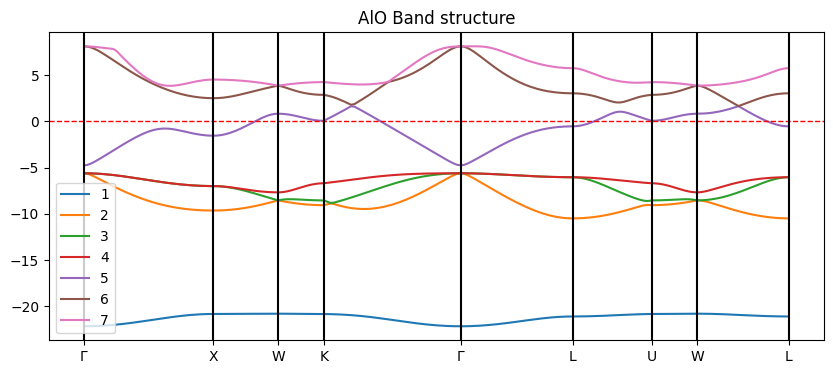

In [154]:
# Import bands data (two columns: position along x axis, energy (eV))
bands = np.loadtxt('AlO.bands.dat.gnu')

# Extract position along x-axis 
labels = [r'$\Gamma$', "X", "W", "K", r'$\Gamma$', "L", "U", "W", "L"]

# Number of bands and number of steps between each two points (in 'XX.bands.in') 
num_bands = 7
num_steps = 40

# Calculate auxiliary variables
num_kpoints = len(labels)
num_pts = (num_kpoints - 1) * num_steps + 1
posx = bands[:num_pts:num_steps, 0]

# Create the Figure
plt.figure(figsize=(10, 4))
plt.title('AlO Band structure')

plt.xticks(posx, labels)
for i in range(num_bands):
    plt.plot(bands[:num_pts, 0], bands[i*num_pts:(i+1)*num_pts, 1] - Ef, label = i+1)
    plt.legend()

# plt.ylim([-10-5.4557,20-5.4557])
# plt.ylim([-0.75,.75])

plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
for l in posx:
    plt.axvline(l, color="k")

## Density of States

Calculated number of electrons: 9.003


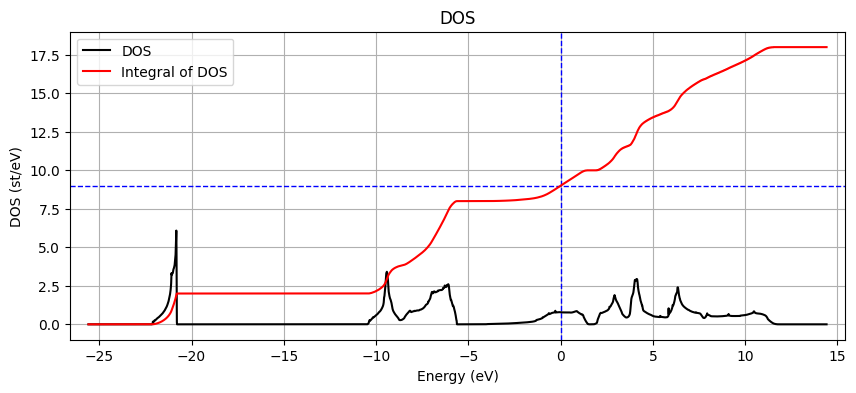

In [155]:
# Import dos data (three columns: energy (eV), dos (states/eV), IDOS (states))
dos = np.loadtxt('AlO.dos')

# Shift by the Fermi Energy
dos[:, 0] = dos[:, 0] - Ef

# Find where IDOS intersects the Fermi energy
index = list(np.abs(dos[:, 0])).index(min(np.abs(dos[:, 0])))
nelec = dos[:, 2][index]

print(f"Calculated number of electrons: {nelec}")

# Create the Figure
plt.figure(figsize=(10, 4))
plt.title('DOS')

plt.axvline(x=0, color='b', linestyle='--', linewidth=1)
plt.axhline(y=nelec, color='b', linestyle='--', linewidth=1)

# Shift all energies by Fermi energy (Make sure the values for bands and DOS are consistent!)
plt.plot(dos[:, 0], dos[:, 1], color = 'k', label="DOS")
plt.plot(dos[:, 0], dos[:, 2], color = 'r', label="Integral of DOS")
plt.legend()

plt.xlabel('Energy (eV)')
plt.ylabel('DOS (st/eV)')
plt.grid(True)

plt.xlim(np.min(dos[:, 0]) - 1, np.max(dos[:, 0]) + 1)
plt.ylim(np.min(dos[:, 2:]) - 1, np.max(dos[:, 2:]) + 1)

plt.savefig('AlO.dos.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

## Analysis

We can see that:
1. The lowest four bands are completelly filled, and the fifth one is partially filled, using the DOS we can compute that the number of filled bands corresponds to 9 electrons per unit cell, which matches with the number of valence electrons considered in our DFT calulations (3 from Al and 6 from O as can be seen on the `AlO.scf.out` file).

2. A semicore electron is an electron which is **not** on the valence level of the atom but which is still taken into account in DFT calculations. In our system we only use the 3 electrons from n=2 for Aluminium and the 6 electrons from n=2 from Oxygen hence there are no semicore electrons. In general, this can be included in the DFT calculation via a suitable pseudopotential, if their wave function far away from the core is significant.

3. The AlO compound we are studying is a metal, because the DOS is non-zero at the Fermi energy (we have a partially filled band).